In [1]:
# load data:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### importe bralibase file to a data frame 



In [2]:
# read Bralibase input that contains several runs of one parameter that was alternated
def read_file_to_df(infile):
    
    #flags:
    set_paramerter = 0
    read_file = 0
    set_header = 0

    sw_parameter = ''
    df_dict ={}


    f = open(infile, 'r') # open the file for reading
    data = []
    for row_num, line in enumerate(f):
        # Remove the new line at the end and then split the string based on
        # tabs. This creates a python list of the values.
        values = line.strip().split('\t')
        # print values

        if values[0] == 'Testing the following parameters:':
            set_paramerter = 1
            continue
        elif set_paramerter == 1:
            # get second part of string e.g. 'struct_cost 0,'
            sw_parameter = values[0].split(' ')[1]
            #print sw_parameter
            sw_parameter = sw_parameter.rstrip(',')
            set_paramerter = 0
            continue
        elif values[0] == '### Begin Objective Function ###':
            read_file = 1
            set_header = 1
            #print 'header'
            continue
        elif read_file ==1:
            if values[0] == '### End Objective Function ###':

                d = dict([(x[0],x[1]) for x in h])
                df = 'df_sw_' + str(sw_parameter)
                df_dict[df] = pd.DataFrame(data=d)
                #print df
                read_file = 0
                continue
            elif set_header == 1:
                h = []
                h = list([(key, []) for key in values])
                #print values
                set_header = 0
            else:
                #print values
                for pos, i in enumerate(values):
                    h[pos][1].append(i)



    f.close() # close the file
    
    return df_dict

In [3]:
# change strings to flote or interger values and add the structure weight as colum
def cast_datatyps_of_df(df, sw_range_list):

    for i in sw_range_list:
        df_name = 'df_sw_' + str(i)
        df[df_name]['PredlocalEndA'] = df[df_name]['PredlocalEndA'].astype(int)
        df[df_name]['PredlocalEndB'] = df[df_name]['PredlocalEndB'].astype(int)
        df[df_name]['PredlocalStartA'] = df[df_name]['PredlocalStartA'].astype(int)
        df[df_name]['PredlocalStartB'] = df[df_name]['PredlocalStartB'].astype(int)
        df[df_name]['sps'] = df[df_name]['sps'].astype(float)
        df[df_name]['spsmax'] = df[df_name]['spsmax'].astype(float)
        df[df_name]['apsi'] = df[df_name]['apsi'].astype(int)
        df[df_name]['sci'] = df[df_name]['sci'].astype(int)
        df[df_name]['score'] = df[df_name]['score'].astype(int)
        df[df_name]['SeqAFp'] = df[df_name]['SeqAFp'].astype(int)
        df[df_name]['SeqATn'] = df[df_name]['SeqATn'].astype(int)
        df[df_name]['SeqATp'] = df[df_name]['SeqATp'].astype(int)
        df[df_name]['SeqAFn'] = df[df_name]['SeqAFn'].astype(int)
        df[df_name]['SeqBFp'] = df[df_name]['SeqBFp'].astype(int)
        df[df_name]['SeqBTn'] = df[df_name]['SeqBTn'].astype(int)
        df[df_name]['SeqBTp'] = df[df_name]['SeqBTp'].astype(int)
        df[df_name]['SeqBFn'] = df[df_name]['SeqBFn'].astype(int)
        df[df_name]['ReflocalEndA'] = df[df_name]['ReflocalEndA'].astype(int)
        df[df_name]['ReflocalEndB'] = df[df_name]['ReflocalEndB'].astype(int)
        df[df_name]['ReflocalStartA'] = df[df_name]['ReflocalStartA'].astype(int)
        df[df_name]['ReflocalStartB'] = df[df_name]['ReflocalStartB'].astype(int)
        df[df_name]['RefsequenceLengthRawA'] = df[df_name]['RefsequenceLengthRawA'].astype(int)
        df[df_name]['RefsequenceLengthRawB'] = df[df_name]['RefsequenceLengthRawB'].astype(int)
        df[df_name]['RefsequenceLengthRefA'] = df[df_name]['RefsequenceLengthRefA'].astype(int)
        df[df_name]['RefsequenceLengthRefB'] = df[df_name]['RefsequenceLengthRefB'].astype(int)
        df[df_name]['sw_range'] = i
        

    return df

In [4]:
# concatinate dataframes for the different sw (for the average and the compleat data)
def concatinate_dfs(sw_range_list, df_dict):
    scores = []
    max_sps = []
    df_names_list = []
    # construct y
    for i in sw_range_list:
        df_name = 'df_sw_' + str(i)
        df_names_list.append(df_dict[df_name])
        df = df_dict[df_name]
        df_score = df[['score']].apply(pd.to_numeric)
        #print df_score
        #print df_score['score'].mean()
        scores.append(int(df_score['score'].mean()))
        df_max_sps = df[['spsmax']].apply(pd.to_numeric)
        max_sps.append(df_max_sps['spsmax'].mean())

    # see each datatyp of a list
    #for element in scores:
        #print element, type(element)     


    np_sw_range = np.array(sw_range_list)    
    np_scores = np.array(scores)
    np_max_sps = np.array(max_sps)



    d = {'sw_range': sw_range_list, 'scores': scores, 'max_sps': max_sps}
    df_avg_scors = pd.DataFrame(data=d)


    df_full_sw_scores = pd.concat(df_names_list)
    #df_full_sw_scores.info()
    
    return df_full_sw_scores, df_avg_scors

In [5]:
# concatinate a colum of the df and the belonging df sw name
def concatinate_dfs_making_sw_colums(sw_range_list, df_dict, column='score'):
    
    df_colum_sw_name = pd.DataFrame()
    
    # construct y
    for i in sw_range_list:
        df_name = 'df_sw_' + str(i)
        column_name = 'sw_' + str(i)
        #print column_name
        df = df_dict[df_name]
        df_colum_sw_name[column_name] = df[column]
        
    
    return df_colum_sw_name

In [6]:
def select_parts_of_df(df_in, identifier):
    df = pd.concat([df_in['Filename'], df_in['sw_range'], df_in['score'], df_in['PredlocalStartA'], df_in['PredlocalEndA'], df_in['PredlocalStartB'], df_in['PredlocalEndB'], df_in['RefsequenceLengthRawA'], df_in['RefsequenceLengthRawB'], df_in['spsmax'], df_in['SeqATp'],  df_in['SeqBTp'],  df_in['SeqATn'],  df_in['SeqBTn'],  df_in['SeqAFp'], df_in['SeqBFp'],  df_in['SeqAFn'], df_in['SeqBFn'], df_in['sum_in_seq_length'],df_in['avg_in_seq_length']], axis=1, keys=['Filename', 'sw_range', 'score', 'PredlocalStartA', 'PredlocalEndA', 'PredlocalStartB', 'PredlocalEndB', 'RefsequenceLengthRawA', 'RefsequenceLengthRawB', 'spsmax', 'SeqATp', 'SeqBTp', 'SeqATn', 'SeqBTn', 'SeqAFp', 'SeqBFp', 'SeqAFn', 'SeqBFn', 'sum_in_seq_length', 'avg_in_seq_length'])
    df['seq'] = identifier
    return df



def generate_one_df(df_full_sw_scores, df_full_sw_scores_shuffled_seq, id_all_shuffeld='shuffled_RNA', id_con_shuffle='unshuffled_RNA'):
    
    df_allseq_unshuffled = select_parts_of_df(df_full_sw_scores, id_con_shuffle)
    df_allseq_shuffled = select_parts_of_df(df_full_sw_scores_shuffled_seq, id_all_shuffeld)
    
    frames = [df_allseq_shuffled, df_allseq_unshuffled]
    df_shuffled_and_unshuffled = pd.concat(frames)
    
    return df_shuffled_and_unshuffled

In [7]:
def create_statisics_df(df_dict, sw_list=[0,50,100,150,200,250,300], sens_spec_sep=True):
    df_plot_sens = pd.DataFrame()
    df_plot_spec = pd.DataFrame()
    df_list = []
    
    for sw in sw_list:
        df_dict_temp =df_dict.loc[df_dict['sw_range'] == sw]
        #df_dict_temp.info()
        df_statisics = df_dict_temp[['SeqATp', 'SeqBTp', 'SeqATn', 'SeqBTn', 'SeqAFp', 'SeqBFp', 'SeqAFn', 'SeqBFn', 'RefsequenceLengthRawA']]
        sens = 'sensitivity_sw_' + str(sw)
        spec = 'specificity_sw_' + str(sw)
        df_plot_sens[sens]= ((df_statisics['SeqATp']/ (df_statisics['SeqATp'] + df_statisics['SeqAFn'])) +(df_statisics['SeqBTp']/ (df_statisics['SeqBTp'] + df_statisics['SeqBFn']))) / 2
        df_plot_spec[spec]= ((df_statisics['SeqATn']/ (df_statisics['SeqATn'] + df_statisics['SeqAFp'])) +(df_statisics['SeqBTn']/ (df_statisics['SeqBTn'] + df_statisics['SeqBFp']))) / 2
        
    return df_plot_sens, df_plot_spec  




In [8]:
# bis zum concat kann man alles zusammen fassen! inklusice ob df in bestimmten range sein soll! 

def generate_dataset(file_name, step_size = 50, start_param = 0, end_param = 300, cut_apsi=100):
    #read file
    df_dict = read_file_to_df(file_name)
    
    # list for different sw datasets 
    end_param = end_param + step_size
    sw_range_list = list(range(start_param,end_param,step_size))
    #print sw_range_list
    
    # cast parameters of df
    df_dict = cast_datatyps_of_df(df_dict, sw_range_list)       
    
    # concatinate dataframe
    df_full_sw_scores, df_avg_scors = concatinate_dfs(sw_range_list, df_dict)
    
    df_full_sw_scores['sens']= ((df_full_sw_scores['SeqATp']/ (df_full_sw_scores['SeqATp'] + df_full_sw_scores['SeqAFn'])) +(df_full_sw_scores['SeqBTp']/ (df_full_sw_scores['SeqBTp'] + df_full_sw_scores['SeqBFn']))) / 2
    df_full_sw_scores['spec']= ((df_full_sw_scores['SeqATn']/ (df_full_sw_scores['SeqATn'] + df_full_sw_scores['SeqAFp'])) +(df_full_sw_scores['SeqBTn']/ (df_full_sw_scores['SeqBTn'] + df_full_sw_scores['SeqBFp']))) / 2
    df_full_sw_scores['sum_in_seq_length'] = df_full_sw_scores['RefsequenceLengthRawA'] + df_full_sw_scores['RefsequenceLengthRawB']
    df_full_sw_scores['avg_in_seq_length'] = (df_full_sw_scores['RefsequenceLengthRawA'] + df_full_sw_scores['RefsequenceLengthRawB'])/2
    df_full_sw_scores['avg_alig_length'] = ((df_full_sw_scores['PredlocalEndA'] - df_full_sw_scores['PredlocalStartA']+1) + (df_full_sw_scores['PredlocalEndB'] - df_full_sw_scores['PredlocalStartB']+1)) / 2
    df_full_sw_scores['sum_alig_length'] = ((df_full_sw_scores['PredlocalEndA'] - df_full_sw_scores['PredlocalStartA']+1) + (df_full_sw_scores['PredlocalEndB'] - df_full_sw_scores['PredlocalStartB']+1)) 
    df_full_sw_scores['avg_in_ncRNA_length'] = (df_full_sw_scores['RefsequenceLengthRefA'] + df_full_sw_scores['RefsequenceLengthRefB'])/2

    
    if (cut_apsi < 100):
        print '< ' + str(cut_apsi)
        df_full_sw_scores = df_full_sw_scores[(df_full_sw_scores.apsi < cut_apsi)]
    
    return df_full_sw_scores, df_avg_scors



In [9]:
# for testing differnce 
# df_full_sw_scores_pen0, df_avg_scors_pen0

def get_difference(df_full_sw_scores, df_full_sw_scores_shuffled_seq):
    df_difference = pd.DataFrame()
    df_rna = df_full_sw_scores.groupby('sw_range')['score'].agg(['min','max','mean'])
    df_shuffled = df_full_sw_scores_shuffled_seq.groupby('sw_range')['score'].agg(['min','max','mean'])
    df_difference['mean_rna'] = df_rna['mean']
    df_difference['mean_shuffeled'] = df_shuffled['mean']
    df_difference['difference'] = df_rna['mean'] - df_shuffled['mean']
    return df_difference

#df_difference_pen0 = get_difference(df_full_sw_scores_pen0, df_full_sw_scores_fullshuffled_pen0)

In [10]:
# plot dir
line_plot_dir = '/home/muellert/Dokumente/locarna_parameteropt/plots/20180808_local_alignment_lineplots_SW_vs_score_or_alignmentlength/'
plot_dir_paper = '/home/muellert/Dokumente/locarna_parameteropt/plots/20181031_plots_for_paper/'

### Read data

In [11]:
# verion 2.RC6
file_dir = '/home/muellert/Dokumente/locarna_parameteropt/Data/20180622_local_sw_Bralibase_with_without_structure'
infile_local_full_shuffled_seqonly = file_dir + '/20180618_local_shuffled_all_con100_Bralibese_version2_sequence_only.log'
infile_local_full_shuffled = file_dir +'/20180619_local_shuffled_all_con100_Bralibese_version2_6.log'
infile_local_context_shuffled_seqonly = file_dir + '/20180619_local_shuffled_only_con100_Bralibese_version2_6_sequence_only.log'
infile_local_context_shuffled = file_dir + '/20180619_local_shuffled_only_con100_Bralibese_version2_6.log'


In [12]:
# define dataset

cut_apsi_value = 100;

if cut_apsi_value < 100:
    plot_title = 'BRAliBase filterd APSI < ' + str(cut_apsi_value)
elif cut_apsi_value == 100:
    plot_title = 'Full BRAliBase' 
else:
    print 'error: apsi sould be between 20 to 100'

### call function to construct df

df APSI 100

In [13]:
df_local_context_shuffled_sw_scores_apsi100, df_local_context_shuffled_apsi100 = generate_dataset(infile_local_context_shuffled, cut_apsi=100)
df_local_context_shuffled_seqonly_sw_scores_apsi100, df_local_context_shuffled_seqonly_apsi100 = generate_dataset(infile_local_context_shuffled_seqonly, cut_apsi=100)
df_local_full_shuffled_sw_scores_apsi100, df_local_full_shuffled_apsi100 = generate_dataset(infile_local_full_shuffled, cut_apsi=100)
df_local_full_shuffled_seqonly_sw_scores_apsi100, df_local_full_shuffled_seqonly_apsi100 = generate_dataset(infile_local_full_shuffled_seqonly, cut_apsi=100)


In [14]:
#print len(df_local_context_shuffled_sw_scores_apsi100)
#print len(df_local_context_shuffled_seqonly_sw_scores_apsi100)
#print len(df_local_full_shuffled_sw_scores_apsi100)
#print len(df_local_full_shuffled_seqonly_sw_scores_apsi100)

In [15]:
#df_local_context_shuffled_sw_scores_apsi100.info()


In [16]:
df_shuffled_and_unshuffled_apsi100 = generate_one_df(df_local_context_shuffled_sw_scores_apsi100, df_local_full_shuffled_sw_scores_apsi100, id_all_shuffeld='shuffled_RNA_pen0', id_con_shuffle='unshuffled_RNA_pen0')
df_shuffled_and_unshuffled_seqonly_apsi100 = generate_one_df(df_local_context_shuffled_seqonly_sw_scores_apsi100, df_local_full_shuffled_seqonly_sw_scores_apsi100, id_all_shuffeld='shuffled_RNA_pen0_seqonly', id_con_shuffle='unshuffled_RNA_pen0_seqonly')

frames = [df_shuffled_and_unshuffled_apsi100, df_shuffled_and_unshuffled_seqonly_apsi100]
df_shuffled_and_unshuffled_apsi100 = pd.concat(frames)

#df_shuffled_and_unshuffled_seqonly_apsi100.info()

In [17]:
df_full_shuffled_apsi100 = generate_one_df(df_local_full_shuffled_sw_scores_apsi100, df_local_full_shuffled_seqonly_sw_scores_apsi100, id_all_shuffeld='Shuffled and sequence only', id_con_shuffle='Shuffled ncRNAs')


df APSI < 70

In [18]:
df_local_context_shuffled_sw_scores_apsi70, df_local_context_shuffled_apsi70 = generate_dataset(infile_local_context_shuffled, cut_apsi=70)
df_local_context_shuffled_seqonly_sw_scores_apsi70, df_local_context_shuffled_seqonly_apsi70 = generate_dataset(infile_local_context_shuffled_seqonly, cut_apsi=70)
df_local_full_shuffled_sw_scores_apsi70, df_local_full_shuffled_apsi70 = generate_dataset(infile_local_full_shuffled, cut_apsi=70)
df_local_full_shuffled_seqonly_sw_scores_apsi70, df_local_full_shuffled_seqonly_apsi70 = generate_dataset(infile_local_full_shuffled_seqonly, cut_apsi=70)


df_shuffled_and_unshuffled_apsi70 = generate_one_df(df_local_context_shuffled_sw_scores_apsi70, df_local_full_shuffled_sw_scores_apsi70, id_all_shuffeld='shuffled_RNA_pen0', id_con_shuffle='unshuffled_RNA_pen0')
df_shuffled_and_unshuffled_seqonly_apsi70 = generate_one_df(df_local_context_shuffled_seqonly_sw_scores_apsi70, df_local_full_shuffled_seqonly_sw_scores_apsi70, id_all_shuffeld='shuffled_RNA_pen0_seqonly', id_con_shuffle='unshuffled_RNA_pen0_seqonly')

frames = [df_shuffled_and_unshuffled_apsi70, df_shuffled_and_unshuffled_seqonly_apsi70]
df_shuffled_and_unshuffled_apsi70 = pd.concat(frames)

#df_shuffled_and_unshuffled_seqonly_apsi70.info()


< 70
< 70
< 70
< 70


In [19]:
#print len(df_shuffled_and_unshuffled)
print len(df_shuffled_and_unshuffled_apsi100)
print len(df_shuffled_and_unshuffled_seqonly_apsi100)
print len(df_shuffled_and_unshuffled_apsi70)
print len(df_shuffled_and_unshuffled_seqonly_apsi70)

173894
86947
84252
42126


In [20]:
#noch:
#assert((len(df_full_sw_scores_pen0)+len(df_full_sw_scores_fullshuffled_pen0)) == len( df_shuffled_and_unshuffled_pen0))
#print len(df_full_sw_scores_pen0)
#print len(df_full_sw_scores_fullshuffled_pen0)
#print len( df_shuffled_and_unshuffled_pen0)

In [21]:
df_shuffled_and_unshuffled_apsi100['alig_length'] = ((df_shuffled_and_unshuffled_apsi100['PredlocalEndA'] - df_shuffled_and_unshuffled_apsi100['PredlocalStartA']+1) + (df_shuffled_and_unshuffled_apsi100['PredlocalEndB'] - df_shuffled_and_unshuffled_apsi100['PredlocalStartB']+1)) / 2
df_shuffled_and_unshuffled_apsi100['norm_alig_length'] = ((df_shuffled_and_unshuffled_apsi100['PredlocalEndA'] - df_shuffled_and_unshuffled_apsi100['PredlocalStartA']+1) + (df_shuffled_and_unshuffled_apsi100['PredlocalEndB'] - df_shuffled_and_unshuffled_apsi100['PredlocalStartB']+1)) / 2

df_full_shuffled_apsi100['alig_length'] = ((df_full_shuffled_apsi100['PredlocalEndA'] - df_full_shuffled_apsi100['PredlocalStartA']+1) + (df_full_shuffled_apsi100['PredlocalEndB'] - df_full_shuffled_apsi100['PredlocalStartB']+1)) / 2

#df_shuffled_and_unshuffled_apsi100.info()

In [22]:
# calculate alignemnt lenth

#df_shuffled_and_unshuffled['ReflocalStartB']
df_shuffled_and_unshuffled_apsi70['alig_length'] = ((df_shuffled_and_unshuffled_apsi70['PredlocalEndA'] - df_shuffled_and_unshuffled_apsi70['PredlocalStartA']+1) + (df_shuffled_and_unshuffled_apsi70['PredlocalEndB'] - df_shuffled_and_unshuffled_apsi70['PredlocalStartB']+1)) / 2
df_shuffled_and_unshuffled_apsi70['norm_alig_length'] = ((df_shuffled_and_unshuffled_apsi70['PredlocalEndA'] - df_shuffled_and_unshuffled_apsi70['PredlocalStartA']+1) + (df_shuffled_and_unshuffled_apsi70['PredlocalEndB'] - df_shuffled_and_unshuffled_apsi70['PredlocalStartB']+1)) / 2

#df_shuffled_and_unshuffled_apsi70.info()

In [23]:

#df_shuffled_and_unshuffled_seqonly_apsi70

df_shuffled_and_unshuffled_apsi70['sens']= ((df_shuffled_and_unshuffled_apsi70['SeqATp']/ (df_shuffled_and_unshuffled_apsi70['SeqATp'] + df_shuffled_and_unshuffled_apsi70['SeqAFn'])) +(df_shuffled_and_unshuffled_apsi70['SeqBTp']/ (df_shuffled_and_unshuffled_apsi70['SeqBTp'] + df_shuffled_and_unshuffled_apsi70['SeqBFn']))) / 2
df_shuffled_and_unshuffled_apsi70['spec']= ((df_shuffled_and_unshuffled_apsi70['SeqATn']/ (df_shuffled_and_unshuffled_apsi70['SeqATn'] + df_shuffled_and_unshuffled_apsi70['SeqAFp'])) +(df_shuffled_and_unshuffled_apsi70['SeqBTn']/ (df_shuffled_and_unshuffled_apsi70['SeqBTn'] + df_shuffled_and_unshuffled_apsi70['SeqBFp']))) / 2
#df_shuffled_and_unshuffled_apsi70.info()        

In [24]:
df_shuffled_and_unshuffled_apsi70_sw100 = df_shuffled_and_unshuffled_apsi70[df_shuffled_and_unshuffled_apsi70.sw_range == 100]
#df_shuffled_and_unshuffled_apsi70_sw100.head()

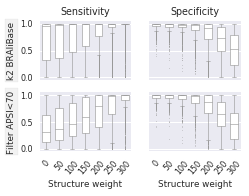

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", font='sans-serif', font_scale=0.8)
col_dims = (3.6, 2.4) # one
#sns.set(font_scale=0.8)  # crazy big


fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(col_dims))

rotation_val = 50
box = dict(facecolor='grey', pad=2, alpha=0.1)


sns.boxplot(x="sw_range", y="sens", data=df_local_context_shuffled_sw_scores_apsi100, ax=ax1, color='white', width=0.6, linewidth=0.6, fliersize=0.6)
ax1.set_title('Sensitivity')
ax1.set_ylabel('k2 BRAliBase', bbox=box, rotation=90)
ax1.set_xlabel('')
for tick in ax1.get_xticklabels(): 
    tick.set(visible=False)

sns.boxplot(x="sw_range", y="spec", data=df_local_context_shuffled_sw_scores_apsi100, ax=ax2, color='white', width=0.6, linewidth=0.6, fliersize=0.6)
ax2.set_title('Specificity')
ax2.set_ylabel('')
ax2.set_xlabel('')
for tick in ax2.get_xticklabels(): 
    tick.set(visible=False)
for tick in ax2.get_yticklabels(): 
    tick.set(visible=False)



sns.boxplot(x="sw_range", y="sens", data=df_local_context_shuffled_sw_scores_apsi70, ax=ax3, color='white', width=0.6, linewidth=0.6, fliersize=0.6)
#ax3.set_title('Distrbution of the sensitivity', fontsize=15)
ax3.set_xlabel('Structure weight')
ax3.set_ylabel('Filter APSI<70', bbox=box, rotation=90)
for tick in ax3.get_xticklabels(): 
    tick.set(rotation=rotation_val)

sns.boxplot(x="sw_range", y="spec", data=df_local_context_shuffled_sw_scores_apsi70, ax=ax4, color='white', width=0.6, linewidth=0.6, fliersize=0.6)
#ax4.set_title('Distrbution of the specificity', fontsize=15)
ax4.set_xlabel('Structure weight')
ax4.set_ylabel('')
for tick in ax4.get_xticklabels(): 
    tick.set(rotation=rotation_val)
for tick in ax4.get_yticklabels(): 
    tick.set(visible=False)


fig.savefig(line_plot_dir  + 'boxplot_sensitivity_specificity_sw0_300_locarnaV2_0RC6_local_full_local_bralibase_con100.pdf', format='pdf')
fig.savefig(line_plot_dir  + 'boxplot_sensitivity_specificity_sw0_300_locarnaV2_0RC6_local_full_local_bralibase_con100.svg', format='svg')

fig.savefig(plot_dir_paper  + 'boxplot_sensitivity_specificity_sw0_300_locarnaV2_0RC6_local_full_local_bralibase_con100.pdf', format='pdf', dpi=300, bbox_inches='tight')


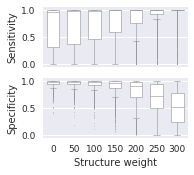

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", font='sans-serif', font_scale=0.9)
col_dims = (2.6, 2.4) 
#sns.set(font_scale=0.8)  # crazy big


fig, ((ax1),(ax2)) = plt.subplots(2,1, figsize=(col_dims))

rotation_val = 50
box = dict(facecolor='grey', pad=2, alpha=0.1)


sns.boxplot(x="sw_range", y="sens", data=df_local_context_shuffled_sw_scores_apsi100, ax=ax1, color='white', width=0.6, linewidth=0.6, fliersize=0.6)

ax1.set_ylabel('Sensitivity')
ax1.set_xlabel('')
for tick in ax1.get_xticklabels(): 
    tick.set(visible=False)
    

sns.boxplot(x="sw_range", y="spec", data=df_local_context_shuffled_sw_scores_apsi100, ax=ax2, color='white', width=0.6, linewidth=0.6, fliersize=0.6)
ax2.set_ylabel('Specificity')
ax2.set_xlabel('Structure weight')
#for tick in ax2.get_xticklabels(): 
#    tick.set(visible=False)
#for tick in ax2.get_yticklabels(): 
#    tick.set(visible=False)

fig.savefig('/home/muellert/Dokumente/locarna_parameteropt/plots/20190130_plots_for_beld_talk/boxplot_sensitivity_specificity_ocal_SW.pdf', format='pdf', dpi=300, bbox_inches='tight')
fig.savefig('/home/muellert/Dokumente/locarna_parameteropt/plots/20190130_plots_for_beld_talk/boxplot_sensitivity_specificity_ocal_SW.png', format='png', dpi=300, bbox_inches='tight')


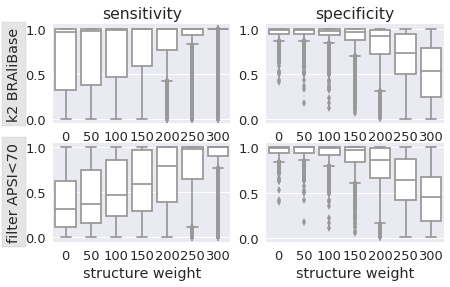

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("paper")
sns.set(font_scale=1.3)  # crazy big
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(7,4))
box = dict(facecolor='grey', pad=5, alpha=0.2)
# , figsize=(10,6)

sns.boxplot(x="sw_range", y="sens", data=df_local_context_shuffled_sw_scores_apsi100, ax=ax1, color='white')
ax1.set_title('sensitivity')
ax1.set_ylabel('k2 BRAliBase', bbox=box, rotation=90)
ax1.set_xlabel('')


sns.boxplot(x="sw_range", y="spec", data=df_local_context_shuffled_sw_scores_apsi100, ax=ax2, color='white')
ax2.set_title('specificity')
ax2.set_ylabel('')
ax2.set_xlabel('')

df_local_context_shuffled_sw_scores_apsi70

sns.boxplot(x="sw_range", y="sens", data=df_local_context_shuffled_sw_scores_apsi70, ax=ax3, color='white')
#ax3.set_title('Distrbution of the sensitivity', fontsize=15)
ax3.set_xlabel('structure weight')
ax3.set_ylabel('filter APSI<70', bbox=box, rotation=90)


sns.boxplot(x="sw_range", y="spec", data=df_local_context_shuffled_sw_scores_apsi70, ax=ax4, color='white')
#ax4.set_title('Distrbution of the specificity', fontsize=15)
ax4.set_xlabel('structure weight')
ax4.set_ylabel('')
fig.savefig(line_plot_dir  + 'poster_boxplot_sensitivity_specificity_sw0_300_locarnaV2_0RC6_local_full_local_bralibase_con100.pdf', format='pdf')
fig.savefig(line_plot_dir  + 'poster_boxplot_sensitivity_specificity_sw0_300_locarnaV2_0RC6_local_full_local_bralibase_con100.svg', format='svg')


fig.savefig(plot_dir_paper  + 'paperAlternative_boxplot_sensitivity_specificity_sw0_300_locarnaV2_0RC6_local_full_local_bralibase_con100.pdf', format='pdf')


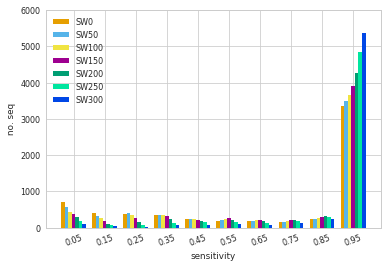

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("paper")
#fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(16,6))
fig, ax = plt.subplots()

#box = dict(facecolor='yellow', pad=5, alpha=0.2)
#df_local_context_shuffled_sw_scores_apsi100.loc[(df_local_context_shuffled_sw_scores_apsi100.sw_range == 0)]
x1 = pd.Series(df_local_context_shuffled_sw_scores_apsi100.loc[(df_local_context_shuffled_sw_scores_apsi100.sw_range == 0)]['sens'], name="SW0")
x2 = pd.Series(df_local_context_shuffled_sw_scores_apsi100.loc[(df_local_context_shuffled_sw_scores_apsi100.sw_range == 50)]['sens'], name="SW50")
x3 = pd.Series(df_local_context_shuffled_sw_scores_apsi100.loc[(df_local_context_shuffled_sw_scores_apsi100.sw_range == 100)]['sens'], name="SW100")
x4 = pd.Series(df_local_context_shuffled_sw_scores_apsi100.loc[(df_local_context_shuffled_sw_scores_apsi100.sw_range == 150)]['sens'], name="SW150")
x5 = pd.Series(df_local_context_shuffled_sw_scores_apsi100.loc[(df_local_context_shuffled_sw_scores_apsi100.sw_range == 200)]['sens'], name="SW200")
x6 = pd.Series(df_local_context_shuffled_sw_scores_apsi100.loc[(df_local_context_shuffled_sw_scores_apsi100.sw_range == 250)]['sens'], name="SW250")
x7 = pd.Series(df_local_context_shuffled_sw_scores_apsi100.loc[(df_local_context_shuffled_sw_scores_apsi100.sw_range == 300)]['sens'], name="SW300")





# Assign colors for each airline and the names
#colors = ['#E69F00', '#56B4E9', '#F0E442', '#9e0090' , '#009E73']
#names = ['pen0', 'pen5', 'pen10', 'pen15' ,'pen20']

colors = ['#E69F00', '#56B4E9', '#F0E442', '#9e0090', '#009E73',  '#00e69f', '#0047e6']
names = ['SW0', 'SW50', 'SW100', 'SW150', 'SW200', 'SW250', 'SW300']

         
# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
#plt.hist([x1, x2, x3, x4, x5], bins = int(180/15), normed=True, color = colors, label=names)
plt.hist([x1, x2, x3, x4, x5, x6, x7], color = colors, label=names)

plt.xticks(np.arange(0.05, 1, step=0.1), rotation=20)



ax.set_ylim([0,6000])


# Plot formatting
plt.legend()
plt.xlabel('sensitivity')
plt.ylabel('no. seq')
#plt.title('structure weight 200')
fig.savefig(line_plot_dir  + 'barplot_sensitivity_sw0_300_locarnaV2_0RC6_local_full_local_bralibase_con100.pdf', format='pdf')
fig.savefig(line_plot_dir  + 'barplot_sensitivity_sw0_300_locarnaV2_0RC6_local_full_local_bralibase_con100.svg', format='svg')

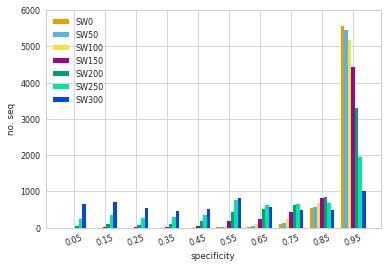

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("paper")
#fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(16,6))
fig, ax = plt.subplots()

#box = dict(facecolor='yellow', pad=5, alpha=0.2)
#df_local_context_shuffled_sw_scores_apsi100.loc[(df_local_context_shuffled_sw_scores_apsi100.sw_range == 0)]
x1 = pd.Series(df_local_context_shuffled_sw_scores_apsi100.loc[(df_local_context_shuffled_sw_scores_apsi100.sw_range == 0)]['spec'], name="SW0")
x2 = pd.Series(df_local_context_shuffled_sw_scores_apsi100.loc[(df_local_context_shuffled_sw_scores_apsi100.sw_range == 50)]['spec'], name="SW50")
x3 = pd.Series(df_local_context_shuffled_sw_scores_apsi100.loc[(df_local_context_shuffled_sw_scores_apsi100.sw_range == 100)]['spec'], name="SW100")
x4 = pd.Series(df_local_context_shuffled_sw_scores_apsi100.loc[(df_local_context_shuffled_sw_scores_apsi100.sw_range == 150)]['spec'], name="SW150")
x5 = pd.Series(df_local_context_shuffled_sw_scores_apsi100.loc[(df_local_context_shuffled_sw_scores_apsi100.sw_range == 200)]['spec'], name="SW200")
x6 = pd.Series(df_local_context_shuffled_sw_scores_apsi100.loc[(df_local_context_shuffled_sw_scores_apsi100.sw_range == 250)]['spec'], name="SW250")
x7 = pd.Series(df_local_context_shuffled_sw_scores_apsi100.loc[(df_local_context_shuffled_sw_scores_apsi100.sw_range == 300)]['spec'], name="SW300")





# Assign colors for each airline and the names
#colors = ['#E69F00', '#56B4E9', '#F0E442', '#9e0090' , '#009E73']
#names = ['pen0', 'pen5', 'pen10', 'pen15' ,'pen20']

colors = ['#E69F00', '#56B4E9', '#F0E442', '#9e0090', '#009E73',  '#00e69f', '#0047e6']
names = ['SW0', 'SW50', 'SW100', 'SW150', 'SW200', 'SW250', 'SW300']

         
# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
#plt.hist([x1, x2, x3, x4, x5], bins = int(180/15), normed=True, color = colors, label=names)
plt.hist([x1, x2, x3, x4, x5, x6, x7], color = colors, label=names)
#ax = sns.distplot([y1, y2, y3, y4], ax=ax2)
plt.xticks(np.arange(0.05, 1, step=0.1), rotation=20)


ax.set_ylim([0,6000])


# Plot formatting
plt.legend()
plt.xlabel('specificity')
plt.ylabel('no. seq')
#plt.title('structure weight 200')
fig.savefig(line_plot_dir  + 'barplot_specificity_sw0_300_locarnaV2_0RC6_local_full_local_bralibase_con100.pdf', format='pdf')
fig.savefig(line_plot_dir  + 'barplot_specificity_sw0_300_locarnaV2_0RC6_local_full_local_bralibase_con100.svg', format='svg')

In [30]:
#df_local_context_shuffled_sw_scores_apsi100.info()
df_local_context_shuffled_sw_scores_apsi100_sw0 = df_local_context_shuffled_sw_scores_apsi100[df_local_context_shuffled_sw_scores_apsi100.sw_range == 0]
#df_local_context_shuffled_sw_scores_apsi100_sw0.info()
df_local_context_shuffled_sw_scores_apsi100_sw200 = df_local_context_shuffled_sw_scores_apsi100[df_local_context_shuffled_sw_scores_apsi100.sw_range == 200]

df_local_full_shuffled_sw_scores_apsi100_sw200 = df_local_full_shuffled_sw_scores_apsi100[df_local_full_shuffled_sw_scores_apsi100.sw_range == 200]


In [31]:
df_local_context_shuffled_sw_scores_apsi100_sw0_filterd = df_local_context_shuffled_sw_scores_apsi100_sw0[df_local_context_shuffled_sw_scores_apsi100_sw0.RefsequenceLengthRawA == df_local_context_shuffled_sw_scores_apsi100_sw0.RefsequenceLengthRawB]
#df_local_context_shuffled_sw_scores_apsi100_sw0.info()

In [32]:
def get_categorized(df, start=0, stop=600, steps=100, length_filter=False):
    df_copy = df.copy()
    df_categorized = categorize_colum(df_copy, min_val=start, maxval=stop, step_size=steps)
    if length_filter == True:
        print 'length filter on!'
        df_categorized = df_categorized.loc[(df_categorized.RefsequenceLengthRawA == df_categorized.RefsequenceLengthRawB)]
    return df_categorized

In [33]:
def categorize_colum(df, min_val, maxval, step_size):
    bin_length= maxval/step_size
    bins = []
    bin_names = []
    bin_val_start = min_val
    bin_val_end = min_val + step_size
    # put error handeling for incorrect bining!!!!
    for i in xrange(0,bin_length,1):
        bin_name = str(bin_val_start) + '-' + str(bin_val_end) 
        bins.append(bin_val_end)
        bin_names.append(bin_name)
        bin_val_start = bin_val_end
        bin_val_end = bin_val_end + step_size
    bins.append(np.inf)
    df['in_length_category'] = pd.cut(df.avg_in_seq_length, bins, labels = bin_names)

    print bin_length
    return df

In [34]:
df_categorized = get_categorized(df_local_full_shuffled_sw_scores_apsi100, start=0, stop=600, steps=60, length_filter=False)
df_categorized_SI70 = get_categorized(df_local_full_shuffled_sw_scores_apsi70, start=0, stop=600, steps=60, length_filter=False)


10
10


In [35]:
df_categorized.groupby(by='in_length_category').count()

,Filename,PredlocalEndA,PredlocalEndB,PredlocalStartA,PredlocalStartB,Predscore,ReflocalEndA,ReflocalEndB,ReflocalStartA,ReflocalStartB,...,sps,spsmax,sw_range,sens,spec,sum_in_seq_length,avg_in_seq_length,avg_alig_length,sum_alig_length,avg_in_ncRNA_length
in_length_category,,,,,,,,,,,,,,,,,,,,,
0-60,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60-120,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120-180,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,...,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239
180-240,31332,31332,31332,31332,31332,31332,31332,31332,31332,31332,...,31332,31332,31332,31332,31332,31332,31332,31332,31332,31332
240-300,6447,6447,6447,6447,6447,6447,6447,6447,6447,6447,...,6447,6447,6447,6447,6447,6447,6447,6447,6447,6447
300-360,2268,2268,2268,2268,2268,2268,2268,2268,2268,2268,...,2268,2268,2268,2268,2268,2268,2268,2268,2268,2268
360-420,1582,1582,1582,1582,1582,1582,1582,1582,1582,1582,...,1582,1582,1582,1582,1582,1582,1582,1582,1582,1582
420-480,392,392,392,392,392,392,392,392,392,392,...,392,392,392,392,392,392,392,392,392,392
480-540,105,105,105,105,105,105,105,105,105,105,...,105,105,105,105,105,105,105,105,105,105


In [36]:
df_categorized_SI70.groupby(by='in_length_category').count()

,Filename,PredlocalEndA,PredlocalEndB,PredlocalStartA,PredlocalStartB,Predscore,ReflocalEndA,ReflocalEndB,ReflocalStartA,ReflocalStartB,...,sps,spsmax,sw_range,sens,spec,sum_in_seq_length,avg_in_seq_length,avg_alig_length,sum_alig_length,avg_in_ncRNA_length
in_length_category,,,,,,,,,,,,,,,,,,,,,
0-60,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60-120,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120-180,140,140,140,140,140,140,140,140,140,140,...,140,140,140,140,140,140,140,140,140,140
180-240,14224,14224,14224,14224,14224,14224,14224,14224,14224,14224,...,14224,14224,14224,14224,14224,14224,14224,14224,14224,14224
240-300,4221,4221,4221,4221,4221,4221,4221,4221,4221,4221,...,4221,4221,4221,4221,4221,4221,4221,4221,4221,4221
300-360,1995,1995,1995,1995,1995,1995,1995,1995,1995,1995,...,1995,1995,1995,1995,1995,1995,1995,1995,1995,1995
360-420,203,203,203,203,203,203,203,203,203,203,...,203,203,203,203,203,203,203,203,203,203
420-480,210,210,210,210,210,210,210,210,210,210,...,210,210,210,210,210,210,210,210,210,210
480-540,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### For this plot the sequence are bined according to there length. How much sequences there are per bin you can see at the tables above

(0, 180)

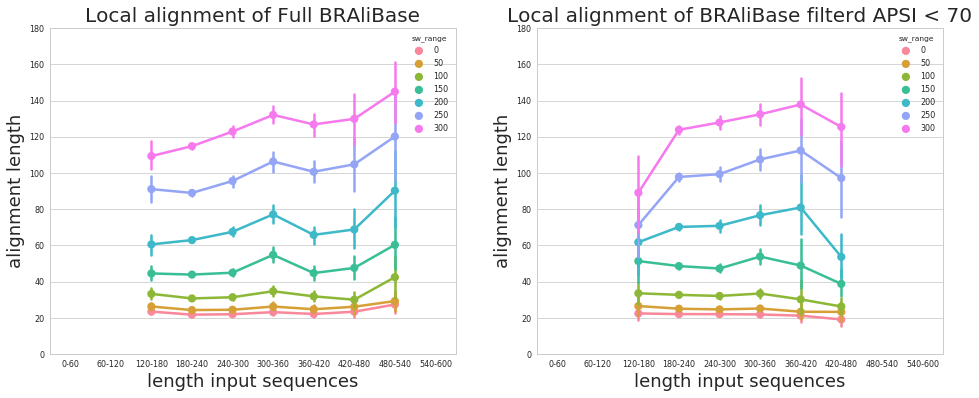

In [37]:

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))

sns.pointplot(x="in_length_category", y="avg_alig_length", hue='sw_range', data=df_categorized, ax=ax1, alpha =1)

ax1.set_title('Local alignment of Full BRAliBase', fontsize=20)
ax1.set_xlabel('length input sequences', fontsize=18)
ax1.set_ylabel('alignment length', fontsize=18)
ax1.set_ylim([0,180])

sns.pointplot(x="in_length_category", y="avg_alig_length", hue='sw_range', data=df_categorized_SI70, ax=ax2, alpha =1)




ax2.set_title('Local alignment of BRAliBase filterd APSI < 70', fontsize=20)
ax2.set_xlabel('length input sequences', fontsize=18)
ax2.set_ylabel('alignment length', fontsize=18)
ax2.set_ylim([0,180])

#fig.savefig(line_plot_dir + 'lineplot_normalizedAlignLength_vs_SW_LocARNAV2.0RC6_local_two_plots_localBralibase_con100.pdf', format='pdf')


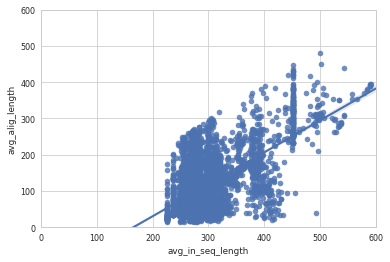

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
fig, ax = plt.subplots()
ax.set_ylim([0,600])
ax.set_xlim([0,600])


ax = sns.regplot(x="avg_in_seq_length", y="avg_alig_length", data=df_local_context_shuffled_sw_scores_apsi100_sw200)

#### This plot shows the avg sequence input length in comarison to the average alignment sequence length. Therefore gaps are not considerd in the length. The Dataset is localBralibase with shuffled con 200 added. 

### Conclusion:
#### It is not obviose from the bralibase data, but one can see that with growing sequence length also the alignements are getting longer!  It looks more linear, however one could also argue the there is to less data points for longer input sequences to draw that conclusion.

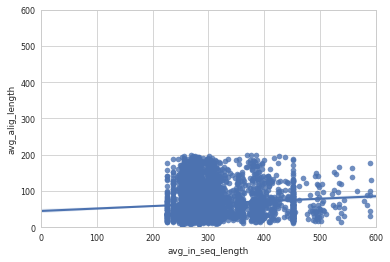

In [39]:

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
fig, ax = plt.subplots()
ax.set_ylim([0,600])
ax.set_xlim([0,600])
ax = sns.regplot(x="avg_in_seq_length", y="avg_alig_length", data=df_local_full_shuffled_sw_scores_apsi100_sw200)

In [40]:
import matplotlib as mpl
font_paths = mpl.font_manager.findSystemFonts()
font_objects = mpl.font_manager.createFontList(font_paths)
font_names = [f.name for f in font_objects]
#print font_names

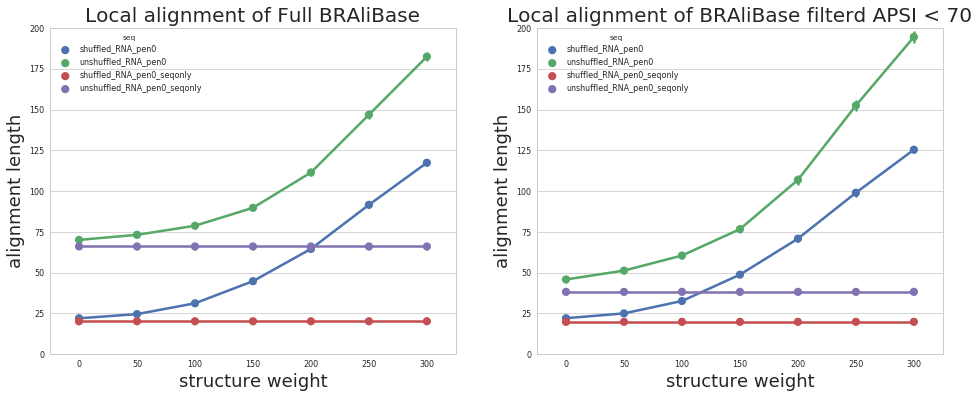

In [41]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))

sns.pointplot(x="sw_range", y="alig_length", hue="seq", data=df_shuffled_and_unshuffled_apsi100, ax=ax1, alpha =1)


ax1.set_title('Local alignment of Full BRAliBase', fontsize=20)
ax1.set_xlabel('structure weight', fontsize=18)
ax1.set_ylabel('alignment length', fontsize=18)
ax1.set_ylim([0,200])

sns.pointplot(x="sw_range", y="alig_length", hue="seq", data=df_shuffled_and_unshuffled_apsi70, ax=ax2, alpha =1)




ax2.set_title('Local alignment of BRAliBase filterd APSI < 70', fontsize=20)
ax2.set_xlabel('structure weight', fontsize=18)
ax2.set_ylabel('alignment length', fontsize=18)
ax2.set_ylim([0,200])


fig.savefig(line_plot_dir + 'lineplot_alignmentLength_vs_SW_LocARNAV2.0RC6_local_two_plots_localBralibase_con100.pdf', format='pdf')

In [42]:
# verion 2.RC6
file_dir_artifial = '/home/muellert/Dokumente/locarna_parameteropt/Data/20180810_local_artifical_dataset/'
infile_local_artificial_data_seqonly = file_dir_artifial + '20180810_local_artificial_dataset_SW_0_300_sequence_only.log'
infile_local_artificial_data = file_dir_artifial +'20180810_local_artificial_dataset_SW_0_300.log'



In [43]:
df_local_artificial_data_sw_scores_apsi100, df_local_artificial_data_apsi100 = generate_dataset(infile_local_artificial_data, cut_apsi=100)
df_local_artificial_data_seqonly_sw_scores_apsi100, df_local_artificial_data_seqonly_apsi100 = generate_dataset(infile_local_artificial_data_seqonly, cut_apsi=100)

df_of_artificial_data_default_seqonly_apsi100 = generate_one_df(df_local_artificial_data_sw_scores_apsi100, df_local_artificial_data_seqonly_sw_scores_apsi100, id_all_shuffeld='Sequence only', id_con_shuffle='Random ncRNAs')

df_of_artificial_data_default_seqonly_apsi100['alig_length'] = ((df_of_artificial_data_default_seqonly_apsi100['PredlocalEndA'] - df_of_artificial_data_default_seqonly_apsi100['PredlocalStartA']+1) + (df_of_artificial_data_default_seqonly_apsi100['PredlocalEndB'] - df_of_artificial_data_default_seqonly_apsi100['PredlocalStartB']+1)) / 2
# df_shuffled_and_unshuffled_apsi100['norm_alig_length'] = ((df_shuffled_and_unshuffled_apsi100['PredlocalEndA'] - df_shuffled_and_unshuffled_apsi100['PredlocalStartA']+1) + (df_shuffled_and_unshuffled_apsi100['PredlocalEndB'] - df_shuffled_and_unshuffled_apsi100['PredlocalStartB']+1)) / 2

#df_of_artificial_data_default_seqonly_apsi100.info()


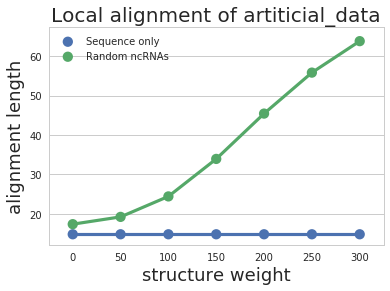

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
#sns.set_context("paper")
#fig = plt.figure(figsize=(6,5))
#ax = fig.gca()# define axis
fig, ax = plt.subplots()




sns.pointplot(x="sw_range", y="alig_length", hue="seq", data=df_of_artificial_data_default_seqonly_apsi100, ax=ax, alpha =1)


#ax.set_title('Comparison of LocARNA alignemnt score using Bralibase with context 100', fontsize=18)
ax.set_title('Local alignment of artiticial_data', fontsize=20)
ax.set_xlabel('structure weight', fontsize=18)
ax.set_ylabel('alignment length', fontsize=18)
l = ax.legend()
l.set_title('')
#ax.set_ylim([1000,14000])
#fig.savefig(line_plot_dir + 'lineplot_alignmentLength_vs_SW_LocARNAV2_0RC6_local_artiticial_data.pdf', format='pdf')

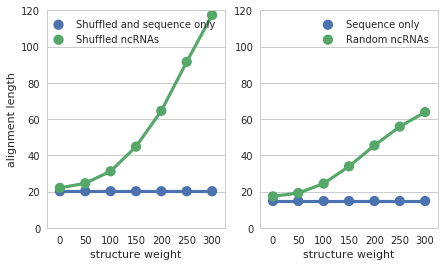

In [45]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(7,4))
sns.set_context("paper")
sns.set(style="whitegrid")

sns.pointplot(x="sw_range", y="alig_length", hue="seq", data=df_full_shuffled_apsi100, ax=ax1, alpha =1)


#ax1.set_title('full BRAliBase')
ax1.set_xlabel('structure weight')
ax1.set_ylabel('alignment length')
ax1.set_ylim([0,120])
l1 = ax1.legend()
l1.set_title('')


sns.pointplot(x="sw_range", y="alig_length", hue="seq", data=df_of_artificial_data_default_seqonly_apsi100, ax=ax2, alpha =1)


#ax.set_title('Comparison of LocARNA alignemnt score using Bralibase with context 100', fontsize=18)
#ax2.set_title('artiticial dataset')
ax2.set_xlabel('structure weight')
ax2.set_ylabel('')
ax2.set_ylim([0,120])
l2 = ax2.legend()
l2.set_title('')


fig.savefig(line_plot_dir + 'lineplot_alignmentLength_vs_SW_LocARNAV2_0RC6_local_fullBralibase_artiticial_data.pdf', format='pdf')
fig.savefig(line_plot_dir + 'lineplot_alignmentLength_vs_SW_LocARNAV2_0RC6_local_fullBralibase_artiticial_data.svg', format='svg')

fig.savefig(plot_dir_paper + 'lineplot_alignmentLength_vs_SW_LocARNAV2_0RC6_local_fullBralibase_artiticial_data.pdf', format='pdf')

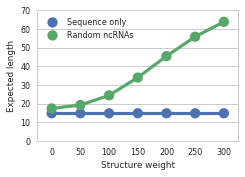

In [46]:
sns.set(style="whitegrid", font='sans-serif', font_scale=0.8)
col_dims = (3.6, 2.4) # one

fig, ax = plt.subplots(figsize=(col_dims))
#sns.set_context("paper")
#sns.set(style="whitegrid")






sns.pointplot(x="sw_range", y="alig_length", hue="seq", data=df_of_artificial_data_default_seqonly_apsi100, ax=ax, alpha =1)


#ax.set_title('Comparison of LocARNA alignemnt score using Bralibase with context 100', fontsize=18)
#ax2.set_title('artiticial dataset')
ax.set_xlabel('Structure weight')
ax.set_ylabel('Expected length')
l = ax.legend()
l.set_title('')
#ax.legend_.remove()
ax.set_ylim([0,70])

fig.savefig(plot_dir_paper + 'lineplot_alignmentLength_vs_SW_LocARNAV2_0RC6_local_artiticial_data.pdf', format='pdf', dpi=300, bbox_inches='tight')
fig.savefig('/home/muellert/Dokumente/locarna_parameteropt/plots/20190130_plots_for_beld_talk/lineplot_alignment_length.png', format='png', dpi=300, bbox_inches='tight')


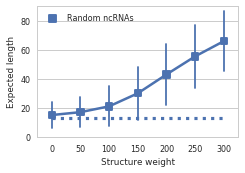

In [47]:
sns.set(style="whitegrid", font='sans-serif', font_scale=0.8)
col_dims = (3.6, 2.4) # one

fig, ax = plt.subplots(figsize=(col_dims))
#sns.set_context("paper")
#sns.set(style="whitegrid")




myblue = (sns.color_palette().as_hex())[0]


sns.pointplot(x="sw_range", y="alig_length", hue="seq", data=df_of_artificial_data_default_seqonly_apsi100[df_of_artificial_data_default_seqonly_apsi100.seq == 'Random ncRNAs'], 
              ax=ax, alpha =1, ci='sd', estimator=np.median, errwidth=1.8, scale=0.8, markers='s')
sns.pointplot(x="sw_range", y="alig_length",  data=df_of_artificial_data_default_seqonly_apsi100[df_of_artificial_data_default_seqonly_apsi100.seq == 'Sequence only'], 
              ax=ax, color=myblue, estimator=np.median,  markers='', linestyles=[':'], alpha=1, ci='sd', errwidth=0)


#ax.set_title('Comparison of LocARNA alignemnt score using Bralibase with context 100', fontsize=18)
#ax2.set_title('artiticial dataset')
ax.set_xlabel('Structure weight')
ax.set_ylabel('Expected length')
l = ax.legend()
l.set_title('')
#ax.legend_.remove()
ax.set_ylim([0,90])

#fig.savefig(plot_dir_paper + 'lineplot_alignmentLength_vs_SW_LocARNAV2_0RC6_local_artiticial_data.pdf', format='pdf', dpi=300, bbox_inches='tight')
#fig.savefig('/home/muellert/Dokumente/locarna_parameteropt/plots/20190130_plots_for_beld_talk/lineplot_alignment_length.png', format='png', dpi=300, bbox_inches='tight')
fig.savefig('/home/muellert/Dokumente/locarna_parameteropt/plots/20190214_lineplots_to_boxplot/lineplot_artifical_expacted_alignment_length.pdf', format='pdf', dpi=300, bbox_inches='tight')


In [48]:
#df_of_artificial_data_default_seqonly_apsi100['alig_length'].mean()
df_of_artificial_data_default_seqonly_apsi100[(df_of_artificial_data_default_seqonly_apsi100.seq == 'Sequence only')]['alig_length'].mean()


14.780928571428571

In [49]:
df_temp = df_of_artificial_data_default_seqonly_apsi100[( df_of_artificial_data_default_seqonly_apsi100.sw_range ==0) & (df_of_artificial_data_default_seqonly_apsi100.seq == 'LocARNA')]
df_temp['alig_length'].mean()

# surveys_df[(surveys_df.year >= 1980) & (surveys_df.year <= 1985)]


nan

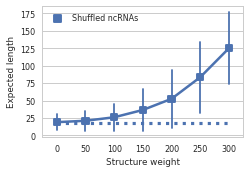

In [50]:
sns.set(style="whitegrid", font='sans-serif', font_scale=0.8)
col_dims = (3.6, 2.4) # one

fig, ax = plt.subplots(figsize=(col_dims))
#sns.set_context("paper")
#sns.set(style="whitegrid")

#sns.pointplot(x="sw_range", y="alig_length", hue="seq", data=df_full_shuffled_apsi100, ax=ax, alpha =1)
sns.pointplot(x="sw_range", y="alig_length", hue="seq", data=df_full_shuffled_apsi100[df_full_shuffled_apsi100.seq == 'Shuffled ncRNAs'], 
              ax=ax, alpha =1, ci='sd', estimator=np.median, scale=0.8, markers='s',errwidth=1.8)
sns.pointplot(x="sw_range", y="alig_length",  data=df_full_shuffled_apsi100[df_full_shuffled_apsi100.seq == 'Shuffled and sequence only'], 
              ax=ax, color=myblue, estimator=np.median,  markers='', linestyles=[':'], alpha=1, ci='sd', errwidth=0)


#ax1.set_title('full BRAliBase')
ax.set_xlabel('Structure weight')
ax.set_ylabel('Expected length')
#ax.set_ylim([0,130])

l = ax.legend()
l.set_title('')

fig.savefig('/home/muellert/Dokumente/locarna_parameteropt/plots/20190214_lineplots_to_boxplot/lineplot_bralibase_expacted_alignment_length.pdf', format='pdf', dpi=300, bbox_inches='tight')


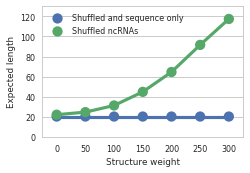

In [51]:
sns.set(style="whitegrid", font='sans-serif', font_scale=0.8)
col_dims = (3.6, 2.4) # one

fig, ax = plt.subplots(figsize=(col_dims))
#sns.set_context("paper")
#sns.set(style="whitegrid")

sns.pointplot(x="sw_range", y="alig_length", hue="seq", data=df_full_shuffled_apsi100, ax=ax, alpha =1)


#ax1.set_title('full BRAliBase')
ax.set_xlabel('Structure weight')
ax.set_ylabel('Expected length')
ax.set_ylim([0,130])

l = ax.legend()
l.set_title('')

fig.savefig(plot_dir_paper + 'lineplot_alignmentLength_vs_SW_LocARNAV2_0RC6_local_fullBralibase.pdf', format='pdf', dpi=300, bbox_inches='tight')